In [1]:
import seaborn as sns

In [2]:
corpus = ["rock beats scissor, rock wins.",
          "scissor cuts paper, scissor wins.",
         "paper covers rock, paper wins"]

[[1 0 0 0 1 1 1]
 [0 0 1 1 0 1 1]
 [0 1 0 1 1 0 1]]


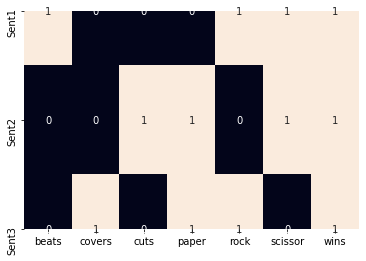

In [3]:
#Collapsed One-hot representation
#One-hot Encoding :: 
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
print(one_hot)

vocab = one_hot_vectorizer.get_feature_names()

sns.heatmap(one_hot, annot=True, cbar=False,
            xticklabels=vocab, yticklabels=['Sent1', 'Sent2', 'Sent3'])

[[0.48559571 0.         0.         0.         0.73861611 0.36930805
  0.28680065]
 [0.         0.         0.48559571 0.36930805 0.         0.73861611
  0.28680065]
 [0.         0.48559571 0.         0.73861611 0.36930805 0.
  0.28680065]]


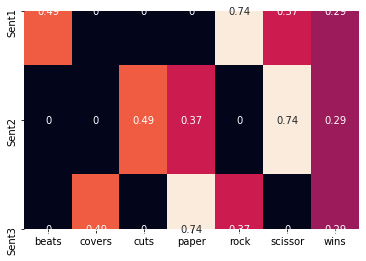

In [4]:
#Tfidf representation
#Tf ::
#IDF ::
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
print(tfidf)

vocab = one_hot_vectorizer.get_feature_names()

sns.heatmap(tfidf, annot=True, cbar=False,
            xticklabels=vocab, yticklabels=['Sent1', 'Sent2', 'Sent3'])

In [5]:
tweet = "rock beats scissor, #rockwins. scissor cuts paper, #scissorwins. paper covers rock, #paperwins @babaakki25"

In [7]:
#Using Spacy
import spacy
from spacy import displacy
model = spacy.load('en_core_web_sm')


#Tokenization
print("Tokens")
print("==================")
for line in corpus:
    print([str(token) for token in model(line)])
print("==================")

#Sentence Segmentation
print("Sentences")
print("==================")
for sent in model(tweet).sents:
    print(sent)
print("==================")

# line = "Robert flew his Ferrari car in London before crashing it."
line = "We used the BERTBASE model pre-trained on English Wikipedia and BooksCorpus for 1M steps."

#Lemmatization
print("Lemmatizarion")
print("==================")
for token in model(line):
    print(token, token.lemma_)
print("==================")

#POS Tagging
#https://spacy.io/api/annotation#pos-tagging
print("POS - Tagging")
print("==================")
for token in model(line):
    print(token, token.pos_, token.tag_)
print("==================")

#Dependency Parse
print("Dependency Parsing")
print("==================")
for token in model(line):
    print(token, token.dep_)
print("==================")
#Visualizartion in jupyter
#displacy.serve(model(line), style="dep")
displacy.render(model(line), style="dep",jupyter=True)

#NER Tagging
print("NER Tagging")
print("==================")
for ent in model(line).ents:
    print(ent, ent.start, ent.end, ent.label_)
print("==================")
#Visualizartion in jupyter
#displacy.serve(model(line), style="ent")
displacy.render(model(line), style="ent", jupyter=True)

#Chunking :: Shallow Parsing
#NER Tagging
print("Chunking/Phrasing")
print("==================")
for chunk in model(line).noun_chunks:
    print(chunk, chunk.label_)
print("==================")

Tokens
['rock', 'beats', 'scissor', ',', 'rock', 'wins', '.']
['scissor', 'cuts', 'paper', ',', 'scissor', 'wins', '.']
['paper', 'covers', 'rock', ',', 'paper', 'wins']
Sentences
rock beats scissor, #rockwins.
scissor cuts paper, #scissorwins.
paper covers rock, #paperwins @babaakki25
Lemmatizarion
We -PRON-
used use
the the
BERTBASE BERTBASE
model model
pre pre
- -
trained train
on on
English English
Wikipedia Wikipedia
and and
BooksCorpus BooksCorpus
for for
1 1
M M
steps step
. .
POS - Tagging
We PRON PRP
used VERB VBD
the DET DT
BERTBASE PROPN NNP
model NOUN NN
pre VERB VBN
- VERB VBN
trained VERB VBN
on ADP IN
English PROPN NNP
Wikipedia PROPN NNP
and CCONJ CC
BooksCorpus PROPN NNP
for ADP IN
1 NUM CD
M PROPN NNP
steps NOUN NNS
. PUNCT .
Dependency Parsing
We nsubj
used ROOT
the det
BERTBASE compound
model dobj
pre subtok
- subtok
trained ccomp
on prep
English compound
Wikipedia pobj
and cc
BooksCorpus conj
for prep
1 nummod
M compound
steps pobj
. punct


NER Tagging
English 9 10 LANGUAGE
BooksCorpus 12 13 ORG
1 14 15 CARDINAL


Chunking/Phrasing
We NP
the BERTBASE model NP
English Wikipedia NP
BooksCorpus NP
1M steps NP


In [8]:
#Using NLTK
from nltk.tokenize import TweetTokenizer, word_tokenize, sent_tokenize
from nltk.util import ngrams

#Tokenization
print("Tokens")
print("==================")
tweetTokenizer = TweetTokenizer()
print(tweetTokenizer.tokenize(tweet))
print(word_tokenize(tweet))
print("==================")

#Sentence Segmentation
print("Sentences")
print("==================")
for sent in sent_tokenize(tweet):
    print(sent)
print("==================")

#N-grams
print("N-grams")
print("==================")
print("Unigrams")
print("------------------")
print(list(ngrams(tweetTokenizer.tokenize(tweet), 1)))
print("Bigrams")
print("------------------")
print(list(ngrams(tweetTokenizer.tokenize(tweet), 2)))
print("Trigrams")
print("------------------")
print(list(ngrams(tweetTokenizer.tokenize(tweet), 3)))
print("==================")

##Lemmatization and Stemmig

##POS Tagging

##Chunking and Phrasing and Shallow parse tree generation

##Dependency Parsing

##NER

#Wordnet alingment for word senses and synonyms

Tokens
['rock', 'beats', 'scissor', ',', '#rockwins', '.', 'scissor', 'cuts', 'paper', ',', '#scissorwins', '.', 'paper', 'covers', 'rock', ',', '#paperwins', '@babaakki25']
['rock', 'beats', 'scissor', ',', '#', 'rockwins', '.', 'scissor', 'cuts', 'paper', ',', '#', 'scissorwins', '.', 'paper', 'covers', 'rock', ',', '#', 'paperwins', '@', 'babaakki25']
Sentences
rock beats scissor, #rockwins.
scissor cuts paper, #scissorwins.
paper covers rock, #paperwins @babaakki25
N-grams
Unigrams
------------------
[('rock',), ('beats',), ('scissor',), (',',), ('#rockwins',), ('.',), ('scissor',), ('cuts',), ('paper',), (',',), ('#scissorwins',), ('.',), ('paper',), ('covers',), ('rock',), (',',), ('#paperwins',), ('@babaakki25',)]
Bigrams
------------------
[('rock', 'beats'), ('beats', 'scissor'), ('scissor', ','), (',', '#rockwins'), ('#rockwins', '.'), ('.', 'scissor'), ('scissor', 'cuts'), ('cuts', 'paper'), ('paper', ','), (',', '#scissorwins'), ('#scissorwins', '.'), ('.', 'paper'), ('pape

In [9]:
#n-grams
def generate_ngrams(text, n):
    """
        N-grams are fixed length (N) consecutive tokens
    """
    return [text[i:i+n] for i in range(len(text)-n+1)]

In [10]:
#Unigram
print(generate_ngrams([token for token in model(tweet)], 1))

[[rock], [beats], [scissor], [,], [#], [rockwins], [.], [scissor], [cuts], [paper], [,], [#], [scissorwins], [.], [paper], [covers], [rock], [,], [#], [paperwins], [@babaakki25]]


In [11]:
#Bigram
print(generate_ngrams([token for token in model(tweet)], 2))

[[rock, beats], [beats, scissor], [scissor, ,], [,, #], [#, rockwins], [rockwins, .], [., scissor], [scissor, cuts], [cuts, paper], [paper, ,], [,, #], [#, scissorwins], [scissorwins, .], [., paper], [paper, covers], [covers, rock], [rock, ,], [,, #], [#, paperwins], [paperwins, @babaakki25]]


In [12]:
#Trigram
print(generate_ngrams([token for token in model(tweet)], 3))

[[rock, beats, scissor], [beats, scissor, ,], [scissor, ,, #], [,, #, rockwins], [#, rockwins, .], [rockwins, ., scissor], [., scissor, cuts], [scissor, cuts, paper], [cuts, paper, ,], [paper, ,, #], [,, #, scissorwins], [#, scissorwins, .], [scissorwins, ., paper], [., paper, covers], [paper, covers, rock], [covers, rock, ,], [rock, ,, #], [,, #, paperwins], [#, paperwins, @babaakki25]]


In [4]:
corpus = 'Who ❤️ "word embeddings" in 2020? I do!!!'